# Assignment 6

**Integrantes:**
* CALDAS VELASQUEZ, JOSUE DANIEL
* CALVO PORTOCARRERO, GABRIELA ISABEL
* IBAÑEZ ABANTO, ANGEL MAURICIO
* SALAS NUÑEZ BORJA, FABIO MANUEL

**Instruction:** This assigment will be graded if everything works well. I will run the script as once and everything should be done without errors and mistakes. I should be able to run your scripts in my computer and get all the results. USE RELATIVE PATHS. An error or exception or anything that breaks the code will means NO GRADE (0). Additionally, you are not able to modify any file handly. It also means NO GRADE (0). Comment everything you think will help others read your script. We expect 0 errors using GitHub. Everything will be graded!

# Part 1.

Generate a folder with the name of your group in this folder GitHub\Diplomado_PUCP_output\sbs\municipal. The code should run even if the folder (already) exists.

## 1. Bibliotecas

In [1]:
# We import all libaries required for webscarping
from selenium import webdriver # For scrape
from webdriver_manager.chrome import ChromeDriverManager # For scrape
from selenium.webdriver.chrome.options import Options # Options driver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import re # For regular expressions (re)
import time # For simulate human behavior.
from time import sleep
import random 
import os, platform
from os.path import dirname as up

# Manejo base de datos
import pandas as pd
from pandas import json_normalize
import numpy as np 

## 2. Folders

In [2]:
path = "...\\...\\Documents\\GitHub\\Diplomado_PUCP"

#we define the former path-like object to access Diplomado_PUCP folder

In [3]:
#we use the method os.path.exists to check whether the specified path exists or not
#different specifications will cover all possible escenarios and ensure that the code will run even if the folder (already)

if not os.path.exists(r"../../_output"):
    os.makedirs(r"../../_output")
if not os.path.exists(r"../../_output/sbs"):
    os.makedirs(r"../../_output/sbs")
if not os.path.exists(r"../../_output/sbs/municipal"):
    os.makedirs(r"../../_output/sbs/municipal")
if not os.path.exists(r"../../_output/sbs/municipal/group4"):
    os.makedirs(r"../../_output/sbs/municipal/group4")
    
#The former method returns a Boolean value, namely, true if path exists otherwise returns False.

# Part 2.

Scrape all the available information in this link. Save an excel file by year and month request. The excel file should be name using the month and year of the sheet.

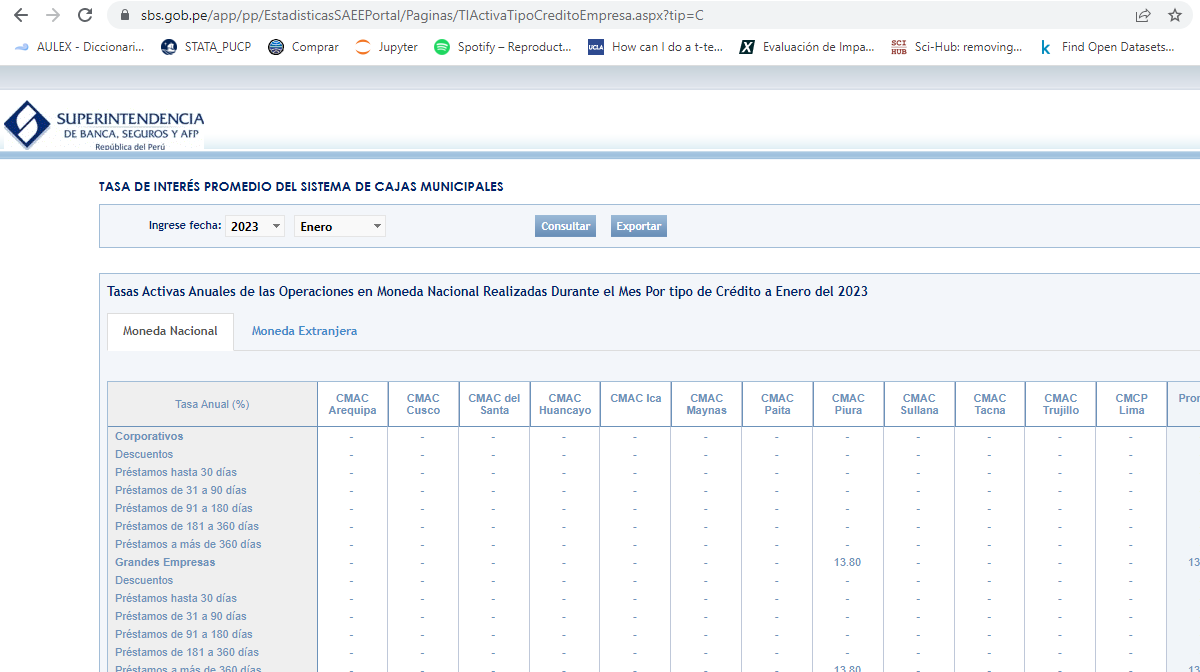

In [4]:
from IPython.display import Image
Image( filename = r"..\Images\SBS_Imagen.png" ) 
#the following image shows SBS's official website covering interest rates informamtion from peruvian municipal funds
#as we can see in the initial box, this website allow visitors to choose information from different years/month
#the main box contains all the information from municipal funds in national currency, from this box we will extract the data

### 2. Scrapping data

### 2.1. Identifying options

In [5]:
# Setting
options = Options()
options.add_argument("start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

#we define a path-like object that corresponds to the webpage of interest
url = "https://www.sbs.gob.pe/app/pp/EstadisticasSAEEPortal/Paginas/TIActivaTipoCreditoEmpresa.aspx?tip=C"
driver.get( url ) #the driver will display this website

In [6]:
# Dropdown button list
dropdown_button_year = driver.find_element( By.ID, "ctl00_cphContent_rAnio") #we use the elements ID
dropdown_button_year.click() # click list to display options
# List of years options
list_year = driver.find_element( By.ID,  "ctl00_cphContent_rAnio_DropDown" )
years_list = list_year.find_elements( By.TAG_NAME, 'li') #Each element (year) within the list of options (using its Tag)
list_year_options = len(years_list) 

# Dropdown button list
dropdown_button_month = driver.find_element( By.ID,  "ctl00_cphContent_rMes") #we use the elements ID
dropdown_button_month.click()

# # List of months options
list_month = driver.find_element( By.ID,  "ctl00_cphContent_rMes_DropDown" ) #we use the elements ID
months_list = list_month.find_elements( By.TAG_NAME, 'li') #Each element (month) within the list of options (using its Tag)
list_month_options = len(months_list)

driver.find_element( By.ID, "ctl00_cphContent_btnConsultaMensual").click() #we use the elements ID
driver.get("https://www.sbs.gob.pe/app/pp/EstadisticasSAEEPortal/Paginas/TIActivaTipoCreditoEmpresa.aspx?tip=C")

In [7]:
#This is done because we are not allow to start from the first element, just from the second one.
year_numbers_opt = np.array( [1, 0 ] + np.arange(2, list_year_options).tolist() )
month_numbers_opt = np.array( [1, 0 ] + np.arange(2, list_month_options).tolist() )

### 2.2 Loop to recover all relevant information

In [8]:
years_info_list = [] #we create an empty list to later store data from years, month and tables
months_info_list = []
tables_info_list = []

for year_number in year_numbers_opt:
    
    # Dropdown button list
    dropdown_button_year = driver.find_element( By.ID, "ctl00_cphContent_rAnio") #we use the elements ID
    dropdown_button_year.click()

    # List of years options
    time.sleep(0.5) #to simulate human behaviour during extraction
    driver.find_element( By.XPATH,  f"/html/body/form/div[1]/div/ul/li[{year_number + 1 }]" ).click()
    year_text = driver.find_element( By.ID, "ctl00_cphContent_rAnio").text #we use the elements ID

    
        
    for month_number in month_numbers_opt:
        
        # Dropdown button list
        dropdown_button_month = driver.find_element( By.ID, "ctl00_cphContent_rMes") #we use the elements ID
        dropdown_button_month.click()

        # # List of months options
        time.sleep(0.5)
        driver.find_element( By.XPATH,  f"/html/body/form/div[1]/div/ul/li[{month_number + 1 }]" ).click()
        month_text = driver.find_element( By.ID, "ctl00_cphContent_rMes").text #we use the elements ID and turn it to text
        print( year_text )
        print( month_text )
        
        # Click consultar
        driver.find_element( By.ID,"ctl00_cphContent_btnConsultaMensual").click()
        time.sleep(5)
        
        year_float = int(year_text )
        
        try:
            # Switch elements
            driver.switch_to.frame(driver.find_element( By.ID,"ctl00_cphContent_pnContenidoAnteriorMnASP"))
            section_tab_table = driver.find_element( By.XPATH,  "/html/body/form/table/tbody" )
            table_html = section_tab_table.get_attribute('outerHTML') #outer permite jalar tabla
            table_pd = pd.read_html( table_html ) #Aca te lee la tabla en html

            # Cleaning tablr
            table_clean_1 = table_pd[1].iloc[5:, :].copy().reset_index( drop = True )

            # Changing switch
            driver.switch_to.default_content()

            print("Table Tipo 1 - Cambiar de Frame y una tabla simple")

        except:
            print("No table Tipo 1")
            table_clean_1 = "Null"
            

        try:
            # Get tables
            section_id_table = driver.find_element( By.ID, "ctl00_cphContent_rpgActualMn_OT" )
            table_html = section_id_table.get_attribute('outerHTML')
            table_pd = pd.read_html( table_html )

            # generate table objects
            table0, table1 = table_pd[0], table_pd[1]
            table_clean_3 = table1.copy()

            # Number of rows of second table
            tb1_rows = table1.shape[0]
            drop_rows = np.arange( 1, tb1_rows + 2 )

            # Clean first table
            table0 = table0.drop( drop_rows, axis = 0 )

            # Assign values to new table
            col_name = table0.iloc[0, 0]
            col_values = table0.iloc[1:, 0].tolist()
            table_clean_3.insert( loc = 0, column= col_name, value = col_values)
            
            print("Table Tipo 2 - No Cambiar de Frame y una tabla Compleja")
            
        except:
            print("No table Tipo 2")
            table_clean_3 = "Null"
            
            
        # Check what to save
        if ( ( isinstance( table_clean_3, str ) == False ) and ( table_clean_3.shape[1] > 5 ) ):
            
            # Data with no frame
            table_clean_3.to_excel( fr"..\..\_output\sbs\municipal\group4/table_clean_{year_text}_{month_text}.xlsx", index = False, header = False )
            
            years_info_list.append( year_float)
            months_info_list.append( month_text )
            tables_info_list.append( "Table 3" )
            print("Guardar Tabla Tipo 2")
            
        elif ( ( isinstance( table_clean_1, str ) == False ) and ( table_clean_1.shape[1] > 5 ) ):
            # Data with frame and 1 table
            table_clean_1.to_excel( fr"..\..\_output\sbs\municipal\group4/table_clean_{year_text}_{month_text}.xlsx", index = False, header = False )
            
            years_info_list.append( year_float)
            months_info_list.append( month_text )
            tables_info_list.append( "Table 1" )
            print("Guardar Tabla Tipo 1")
            
        # No table information
        # Go to a previous day
        else:
            # Day ago
            years_info_list.append( year_float)
            months_info_list.append( month_text )
            tables_info_list.append( "No Table" )
            
        driver.switch_to.default_content()

2022
Febrero
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Enero
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Marzo
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Abril
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Mayo
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Junio
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Julio
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Agosto
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Setiembre
No table Tipo 1
Table Tipo 2 - No Cambiar de Frame y una tabla Compleja
Guardar Tabla Tipo 2
2022
Octubre
No table Tipo 1
Table Tipo 2 - No Cambiar de 